# Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#read file.
df1 = pd.read_csv('Ultimate_AAPL_filtered.csv')
df2 = pd.read_csv('Ultimate_AMZN_filtered.csv')
df3 = pd.read_csv('Ultimate_GOOGL_filtered.csv')
df4 = pd.read_csv('Ultimate_MSFT_filtered.csv')
df5 = pd.read_csv('Ultimate_TSLA_filtered.csv')

# combine all companies' data
df = pd.DataFrame()
df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df= df.drop(columns=['post_date','post_date_date'])
df['Increase'] = (df['Close_price-2days'] > df['Close_price-tmr'])
X=df[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
Y=df['Increase']

    
# normalize variables
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaledX,columns=["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"])
scaled_df['Increase'] = Y
newX=scaled_df[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
newY=scaled_df['Increase']

# split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size = 0.30)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
C_list = [1,10,100,1000]
scores_linear = []
scores_poly = []
scores_gauss = []

from sklearn.svm import SVC

for i in range(len(C_list)):
    svm_linear = SVC(kernel="linear", C=C_list[i])
    svm_poly = SVC(kernel='poly', degree=2, C=C_list[i])  #polynomial kernel with degree 2.
    svm_gauss = SVC(kernel='rbf', gamma=1, C=C_list[i])   #gaussian rbf kernel
    
    #train the model with train data set
    svm_linear.fit(X_train,y_train) 
    svm_poly.fit(X_train,y_train)
    svm_gauss.fit(X_train,y_train)
    
    #test the model with test data set and see how close are the prediction from real
    scores_linear.append(svm_linear.score(X_test,y_test))
    scores_poly.append(svm_poly.score(X_test,y_test))
    scores_gauss.append(svm_gauss.score(X_test,y_test))

scores = pd.DataFrame([scores_linear,scores_poly,scores_gauss], index = ['linear','poly','gauss'], columns = C_list)
scores

,1,10,100,1000
linear,0.514,0.514000,0.514000,0.515000
poly,0.514,0.514333,0.514667,0.514667
gauss,0.514,0.516000,0.516667,0.507333


# Neural Network

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#read file.
df1 = pd.read_csv('Ultimate_AAPL_filtered.csv')
df2 = pd.read_csv('Ultimate_AMZN_filtered.csv')
df3 = pd.read_csv('Ultimate_GOOGL_filtered.csv')
df4 = pd.read_csv('Ultimate_MSFT_filtered.csv')
df5 = pd.read_csv('Ultimate_TSLA_filtered.csv')

# combine all companies' data
df = pd.DataFrame()
df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df= df.drop(columns=['post_date','post_date_date'])
df['Increase'] = (df['Close_price-2days'] > df['Close_price-tmr'])
X=df[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
Y=df['Increase']
    
# normalize variables
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaledX,columns=["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"])
scaled_df['Increase'] = Y
newX=scaled_df[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
newY=scaled_df['Increase']
    
# split training data, validation data, testing data
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(newX, newY, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(873931, 7) (187271, 7) (187271, 7) (873931,) (187271,) (187271,)


In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
#  input shape is 7 since we have 7 input features as indepent variables # all 32 units share the training size
# meaning that each unit has size (training_size)/32
model = Sequential([
    Dense(units = 32, activation='relu', input_shape=(7,)),
    Dense(units = 32, activation='relu'),
    Dense(units = 1, activation='sigmoid')
])
from tensorflow.keras.losses import BinaryCrossentropy
#model.compile(loss=BinaryCrossentropy())
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss='binary_crossentropy',
            metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_val, Y_val))

2023-04-26 13:02:55.677506: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/5
27311/27311 [==============================] - 57s 2ms/step - loss: 0.6925 - accuracy: 0.5123 - val_loss: 0.6918 - val_accuracy: 0.5186
Epoch 2/5
27311/27311 [==============================] - 55s 2ms/step - loss: 0.6913 - accuracy: 0.5229 - val_loss: 0.6914 - val_accuracy: 0.5266
Epoch 3/5
27311/27311 [==============================] - 54s 2ms/step - loss: 0.6909 - accuracy: 0.5252 - val_loss: 0.6911 - val_accuracy: 0.5240
Epoch 4/5
27311/27311 [==============================] - 53s 2ms/step - loss: 0.6908 - accuracy: 0.5256 - val_loss: 0.6910 - val_accuracy: 0.5211
Epoch 5/5
27311/27311 [==============================] - 55s 2ms/step - loss: 0.6906 - accuracy: 0.5261 - val_loss: 0.6915 - val_accuracy: 0.5149


In [7]:
model.evaluate(X_test, Y_test)

5853/5853 [==============================] - 10s 2ms/step - loss: 0.6914 - accuracy: 0.5155


[0.6914133429527283, 0.515541672706604]

# Logistic Regression

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#read file.
df1 = pd.read_csv('Ultimate_AAPL_filtered.csv')
df2 = pd.read_csv('Ultimate_AMZN_filtered.csv')
df3 = pd.read_csv('Ultimate_GOOGL_filtered.csv')
df4 = pd.read_csv('Ultimate_MSFT_filtered.csv')
df5 = pd.read_csv('Ultimate_TSLA_filtered.csv')

# combine all companies' data
df = pd.DataFrame()
df = df.append(df1, ignore_index=True)
df = df.append(df2, ignore_index=True)
df = df.append(df3, ignore_index=True)
df = df.append(df4, ignore_index=True)
df = df.append(df5, ignore_index=True)
df= df.drop(columns=['post_date','post_date_date'])
df['Increase'] = (df['Close_price-2days'] > df['Close_price-tmr'])
X=df[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
Y=df['Increase']
    
# normalize variables
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaledX,columns=["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"])
scaled_df['Increase'] = Y
newX=scaled_df[["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]]
newY=scaled_df['Increase']

# split training data and testing data
X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size = 0.30)

# set up the logistic regression from sklearn
clf = LogisticRegression(random_state=0) # set parameter C=1e12 to make the logistic reg without regulation
# train the model with training data X_train and y_train
clf.fit(X_train, y_train)

# generate coefficients' estimations for each variable
estimations = pd.DataFrame(clf.coef_.transpose(), ["comment_num","retweet_num","like_num", "follower_count","compound_score","Close_price-today","Close_price-tmr"]).transpose()
estimations = estimations.rename(index = {0:'coeff_estimates'})
estimations['intercept'] = clf.intercept_
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
estimations['Accuracy'] = clf.score(X_test,y_test)
estimations

Accuracy: 0.503767267756353


,comment_num,retweet_num,like_num,follower_count,compound_score,Close_price-today,Close_price-tmr,intercept,Accuracy
coeff_estimates,0.246896,-0.905442,0.489606,-0.809247,-0.029504,2.070092,-1.890859,0.006019,0.503767


# LSTM: train on Apple, test on Google

# Visualization

Text(0, 0.5, 'Prices ($)')

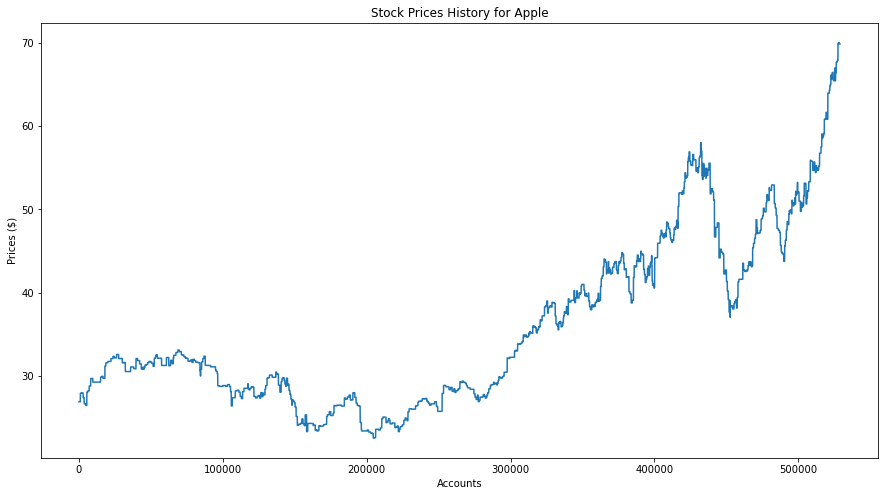

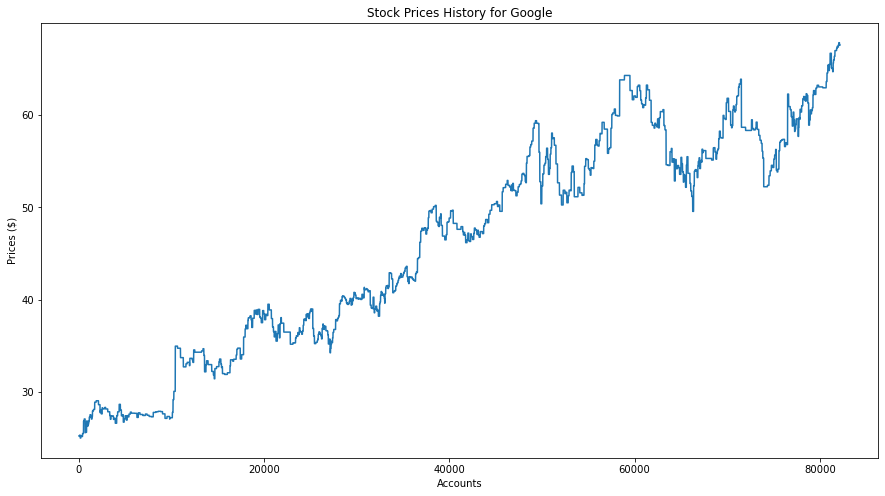

In [227]:
import math
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from datetime import datetime as dt
from sklearn.model_selection import train_test_split

df1 = pd.read_csv('Ultimate_AAPL_filtered.csv')
df3 = pd.read_csv('Ultimate_GOOGL_filtered.csv')

fig = plt.figure(figsize=(15, 8))
plt.title('Stock Prices History for Apple')
plt.plot(df1['Close_price-2days'])
plt.xlabel('Index')
plt.ylabel('Prices ($)')

fig = plt.figure(figsize=(15, 8))
plt.title('Stock Prices History for Google')
plt.plot(df3['Close_price-2days'])
plt.xlabel('Index')
plt.ylabel('Prices ($)')

In [229]:
# only do LSTM on Google in case of the time
X=df3[["Close_price-today","Close_price-tmr"]]
Y=df3['Close_price-2days']
    
# normalize variables
scaler = MinMaxScaler()
scaledX = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaledX,columns=["Close_price-today","Close_price-tmr"])
scaled_df['Close_price-2days'] = Y
X_train=scaled_df[["Close_price-today","Close_price-tmr"]]
Y_train=scaled_df['Close_price-2days']

In [230]:
# construct the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))

# train the LSTM model using Google's stock
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size= 1, epochs=3)

2023-04-25 00:17:17.147010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 00:17:17.151629: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 00:17:17.154027: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/3


2023-04-25 00:17:18.515231: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 00:17:18.517879: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 00:17:18.519818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

82163/82163 [==============================] - 474s 6ms/step - loss: 2.5310
Epoch 2/3
82163/82163 [==============================] - 440s 5ms/step - loss: 0.7718
Epoch 3/3
82163/82163 [==============================] - 384s 5ms/step - loss: 0.7095


In [231]:
# test on Apple's stock
Apple_X=df1[["Close_price-today","Close_price-tmr"]]
Apple_Y=df1['Close_price-2days']
    
# normalize variables
scaler = MinMaxScaler()
scaledX_Apple = scaler.fit_transform(Apple_X)
scaled_df_Apple = pd.DataFrame(scaledX_Apple,columns=["Close_price-today","Close_price-tmr"])
scaled_df_Apple['Close_price-2days'] = Apple_Y
testX_Apple=scaled_df_Apple[["Close_price-today","Close_price-tmr"]]
testY_Apple=scaled_df_Apple['Close_price-2days']

predictions = model.predict(testX_Apple)
predictions = np.reshape(predictions, (predictions.shape[0])) # get rid of 2nd dimension
error = np.sqrt(np.mean(predictions - testY_Apple)**2)
error

2023-04-25 00:39:11.967348: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-25 00:39:11.971886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-25 00:39:11.974170: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

16528/16528 [==============================] - 51s 3ms/step


1.9676820343228703

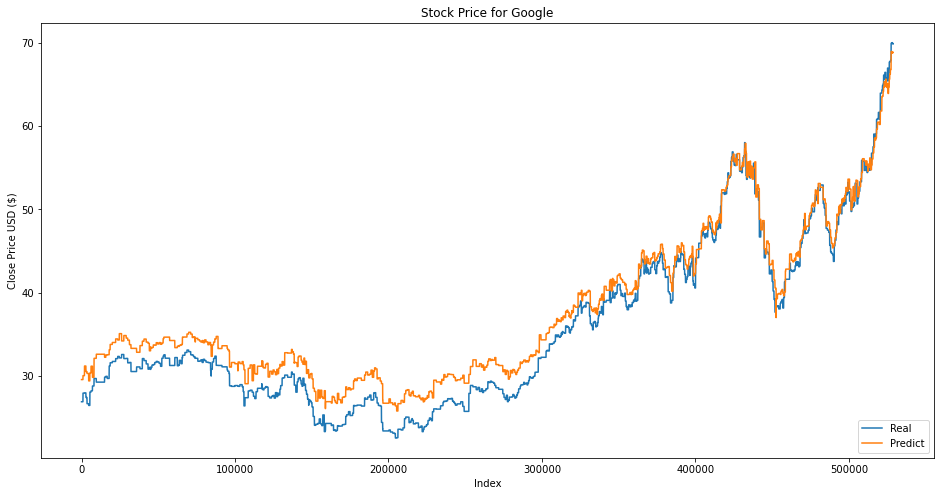

In [233]:
plt.figure(figsize=(16,8))
plt.title('Stock Price for Google')
plt.xlabel('Index')
plt.ylabel('Close Price USD ($)')
plt.plot(testY_Apple)
plt.plot(predictions)
plt.legend(['Real', 'Predict'], loc='lower right')
plt.show()